In [1]:
##-----------------------------------------------------------------------------------------##
##-----------------------------------------------------------------------------------------##
##----------------------Convolutional Neural Network for CIFAR-10--------------------------##
##-----------------------------------------------------------------------------------------##
##-----------------------------------------------------------------------------------------##


In [2]:
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from tensorflow.keras import datasets, layers, models, utils
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from keras.applications.vgg16 import VGG16

In [3]:
#load the data

(x_train, y_train), (x_test, y_test)  = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
#normalize the x_train and x_test data to range [0,1]

X_train=x_train/255.0
X_test=x_test/255.0

print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


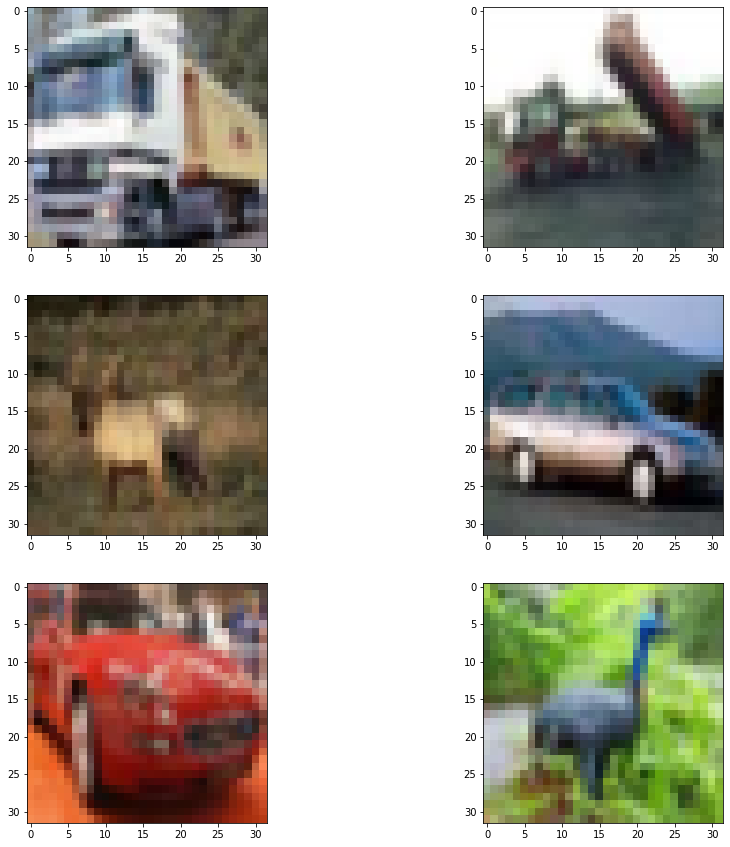

In [5]:
# Visualizing the CIFAR-10 data

fig = plt.figure(figsize=(15, 15))
for i in range(1,7):
  ax = fig.add_subplot(3, 2, i)

  plt.imshow(X_train[i])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 64)                3

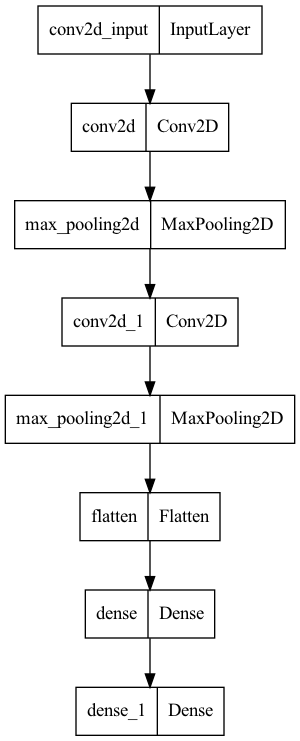

In [6]:
## define first cnn model in the experiment with 2 convolutional layers followed with a max pooling layer(4 by 4)
## filter size of 32 and strides of 2
## plot the model configuration.

model = models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(4,4), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((4, 4),strides=2,padding='valid'))
model.add(layers.Conv2D(filters=32,kernel_size=(4,4), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((4, 4),strides=2,padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation ='relu'))
model.add(layers.Dense(10, activation ='softmax'))

model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
plot_model(model, to_file='first_model.png')

In [7]:
## model training for 15 epoches

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15,verbose=1)

Epoch 1/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5765 - accuracy: 0.4254 - val_loss: 1.3556 - val_accuracy: 0.5176
Epoch 2/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2610 - accuracy: 0.5497 - val_loss: 1.1948 - val_accuracy: 0.5750
Epoch 3/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1464 - accuracy: 0.5961 - val_loss: 1.1582 - val_accuracy: 0.5891
Epoch 4/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0783 - accuracy: 0.6222 - val_loss: 1.1208 - val_accuracy: 0.6070
Epoch 5/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0213 - accuracy: 0.6444 - val_loss: 1.0406 - val_accuracy: 0.6460
Epoch 6/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9798 - accuracy: 0.6579 - val_loss: 1.0359 - val_accuracy: 0.6334
Epoch 7/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9483 - accuracy: 0.6704 - val_loss: 1.0572 -

In [8]:
## evaluate the model's accuracy

model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9137 - accuracy: 0.6887


[0.9137438535690308, 0.6887000203132629]

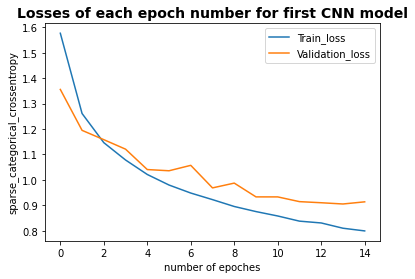

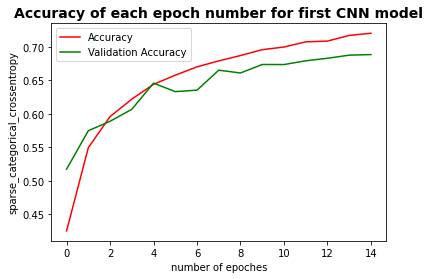

In [9]:
## plot results from model1.

model1_train = history.history['loss']
model1_validation = history.history['val_loss']
model1_accuracy = history.history['accuracy']
model1_valaccuracy = history.history['val_accuracy']
  
# plot losses
plt.plot(model1_train, label = "Train_loss")
plt.plot(model1_validation, label = "Validation_loss")

plt.xlabel('number of epoches')
plt.ylabel('sparse_categorical_crossentropy')
plt.title('Losses of each epoch number for first CNN model',fontweight ="bold",fontsize=14)
plt.legend()
plt.show()

# plot accuracy
plt.plot(model1_accuracy, label = "Accuracy",color="red")
plt.plot(model1_valaccuracy, label = "Validation Accuracy",color="green")

plt.xlabel('number of epoches')
plt.ylabel('sparse_categorical_crossentropy')
plt.title('Accuracy of each epoch number for first CNN model',fontweight ="bold",fontsize=14)
plt.legend()
plt.show()


In [12]:
## define the function to visualize the filters in the convolutional layers

#-------------------------------------------------
# call with model_name to view the visualization 
# of all conv layer filters
#-------------------------------------------------

#visualization of the first conv filters
def filterVisual(model_name):
    for layer in model_name.layers:
        # check for convolutional layer
        if 'conv' not in layer.name:
            continue
        filters, biases = layer.get_weights()
        print(layer.name, filters.shape)
        
        f_min, f_max = filters.min(), filters.max()
        filters = (filters-f_min)/(f_max - f_min)
        
        num_filters, r, c = filters.shape[3], 0, 0
        if(filters.shape[2]>3):
            fig, ax = plt.subplots(int(num_filters*filters.shape[2]/4),4,figsize=(15,15))
        else:
            fig, ax = plt.subplots(int(num_filters/4),4,figsize=(15,15))
        
        for i in range(num_filters):
        # get the filter
            f = filters[:, :, :, i]
            if(filters.shape[2]>3):
                for j in range(f.shape[2]):
                    ax[r,c].imshow(f[:,:,j])
                    ax[r,c].axis('off')
                    if(c<3):
                        c+=1
                    else:
                        c=0
                        r+=1
            else:
                ax[r,c].imshow(f)
                ax[r,c].axis('off')
                if(c<3):
                    c+=1
                else:
                    c=0
                    r+=1

        # show the figure
        plt.show()
        



conv2d (4, 4, 3, 32)


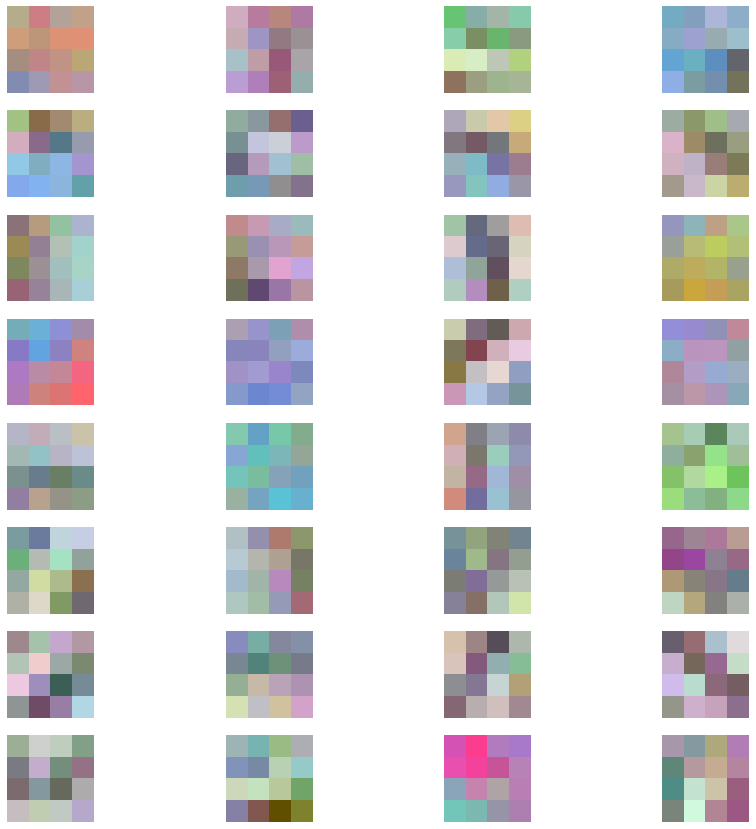

conv2d_1 (4, 4, 32, 32)


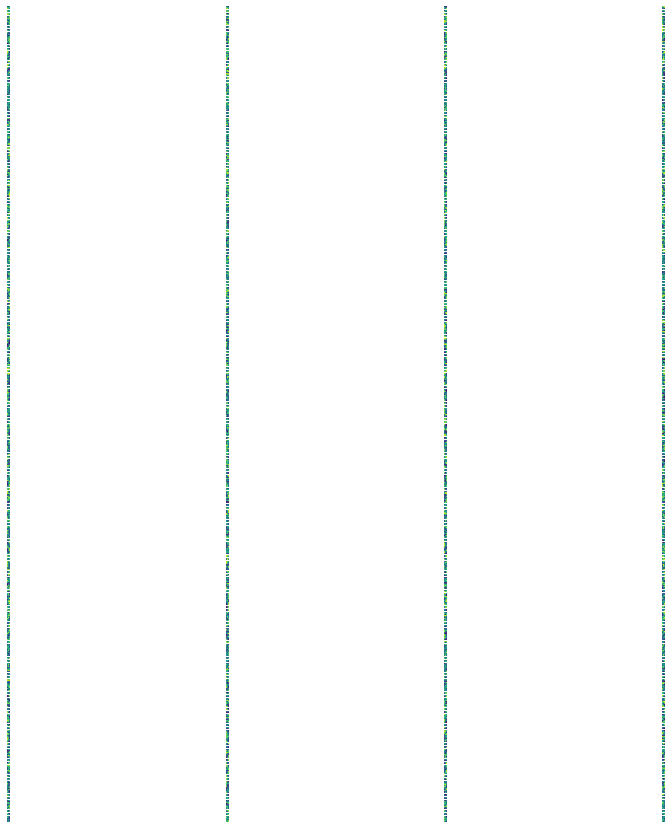

In [13]:
## show filter for first model

filterVisual(model)

In [14]:
#visualization the feature maps, setting up a new model_filter to compute intermediate steps

    #---------------------------------------------------
    # you can change this [0,4999] for figure_id in 
    # X_train and [0,999] for figure_id in X_test
    # to see each figure's feature maps during 
    # training, the set_name refer to X_train or X_test
    # the model_name refer to different model scenarios
    #---------------------------------------------------
def top9FeatureMapVisual(model_name, set_name, figure_id):

    np.seterr(divide='ignore', invalid='ignore')

    successive_outputs = [layer.output for layer in model_name.layers[0:]]

    model_filter = models.Model(inputs = model_name.input, outputs = successive_outputs)

    #calculate the L2 norm of the feature maps for each conv layers for X_train data set
    feature_maps = model_filter.predict(set_name)

    names = [layer.name for layer in model_name.layers]

    #loop through all layers to get the conv layers to display
    #calculate the feature maps for specific X_train example
   
    #show current selected figure

    plt.imshow(set_name[figure_id])


    for layer_name, feature_map in zip (names,feature_maps):
        if "conv" in layer_name:
            l2 = []
            size = feature_map.shape[1]
            n_features = feature_map.shape[3]
            for i in range(n_features):

                l2.append(np.linalg.norm(feature_map[figure_id,:,:,i]))
            #take top 9 feature maps' idxes
            l2 = np.array(l2)
            idxes = np.argpartition(l2, -9)[-9:]
            #sort the idxes from largest to smallest (activation maps from highest to lowest)
            idxes = idxes[::-1]


            #visualize the top 9 feature maps
            display_grid = np.zeros((size, size * 9))
            rid = 0

            for i in idxes:
                #viewing the first training example
                x  = feature_map[figure_id, :, :, i] 
                x -= x.mean()
                x /= x.std ()
                x *=  64
                x += 128
                x  = np.clip(x, 0, 255).astype('uint8')
                # assign each grid to the current feature map
                display_grid[:, rid * size : (rid + 1) * size] = x 
                rid += 1
                scale = 20. / 9
            #display for each conv layer
            plt.figure( figsize=(scale * 9, scale) )
            plt.title ( layer_name )
            plt.grid  ( False )
            plt.imshow( display_grid, aspect='auto' )     



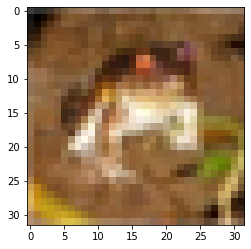

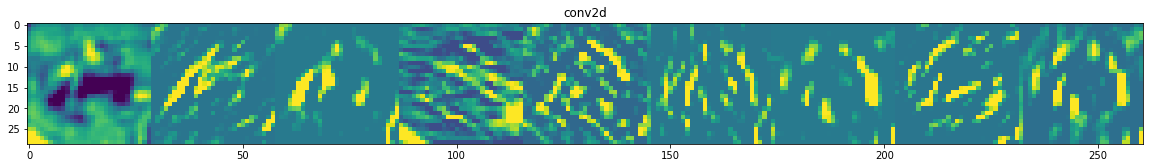

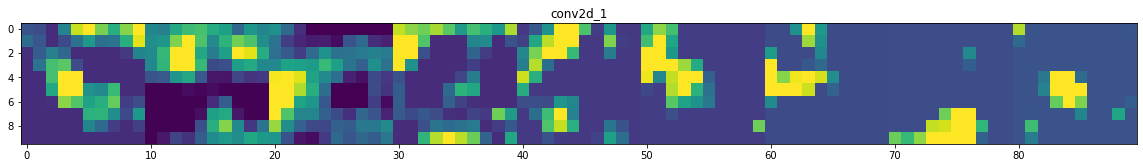

In [15]:
## show top 9 feature maps for the first figure in the training set

top9FeatureMapVisual(model, X_train, 0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        3136      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        65600     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)         

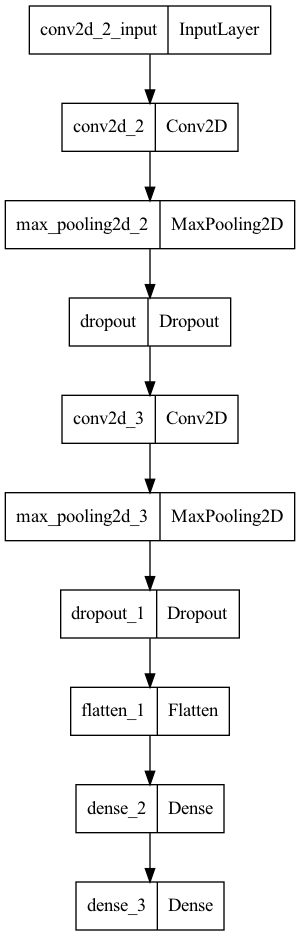

In [16]:
#define second cnn model in the experiment - with 2 convolutional layers followed with a max pooling layer(2 by 2)
## filter size of 64 and strides of 2
## plot the model configuration.

model2 = models.Sequential()
model2.add(layers.Conv2D(filters=64,kernel_size=(4,4), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2),strides=2,padding='valid'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Conv2D(filters=64,kernel_size=(4,4), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2),strides=2,padding='valid'))
model2.add(layers.Dropout(0.25))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation ='relu'))
model2.add(layers.Dense(10, activation ='softmax'))

model2.summary()
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
plot_model(model2, to_file='second_model.png')

In [17]:
## train the second model for 15 epoches

history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15,verbose=1)

Epoch 1/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5792 - accuracy: 0.4274 - val_loss: 1.2851 - val_accuracy: 0.5492
Epoch 2/15
1563/1563 [==============================] - 51s 33ms/step - loss: 1.2710 - accuracy: 0.5497 - val_loss: 1.1683 - val_accuracy: 0.5943
Epoch 3/15
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1417 - accuracy: 0.5952 - val_loss: 1.1375 - val_accuracy: 0.6062
Epoch 4/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.0602 - accuracy: 0.6275 - val_loss: 1.0041 - val_accuracy: 0.6593
Epoch 5/15
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9932 - accuracy: 0.6536 - val_loss: 0.9489 - val_accuracy: 0.6694
Epoch 6/15
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9441 - accuracy: 0.6692 - val_loss: 0.9674 - val_accuracy: 0.6596
Epoch 7/15
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9035 - accuracy: 0.6832 - val_loss: 0.8934 -

In [19]:
## evaluate the model's accuracy

model2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8691 - accuracy: 0.7101


[0.8690629005432129, 0.710099995136261]

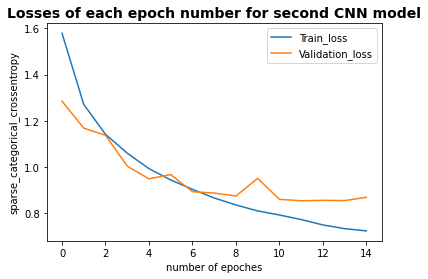

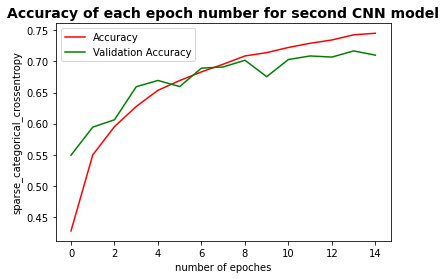

In [20]:
## plot the model2's results

model2_train = history2.history['loss']
model2_validation = history2.history['val_loss']
model2_accuracy = history2.history['accuracy']
model2_valaccuracy = history2.history['val_accuracy']
  
# plot losses
plt.plot(model2_train, label = "Train_loss")
plt.plot(model2_validation, label = "Validation_loss")

plt.xlabel('number of epoches')
plt.ylabel('sparse_categorical_crossentropy')
plt.title('Losses of each epoch number for second CNN model',fontweight ="bold",fontsize=14)
plt.legend()
plt.show()

# plot accuracy
plt.plot(model2_accuracy, label = "Accuracy",color="red")
plt.plot(model2_valaccuracy, label = "Validation Accuracy",color="green")

plt.xlabel('number of epoches')
plt.ylabel('sparse_categorical_crossentropy')
plt.title('Accuracy of each epoch number for second CNN model',fontweight ="bold",fontsize=14)
plt.legend()
plt.show()

conv2d_4 (4, 4, 3, 64)


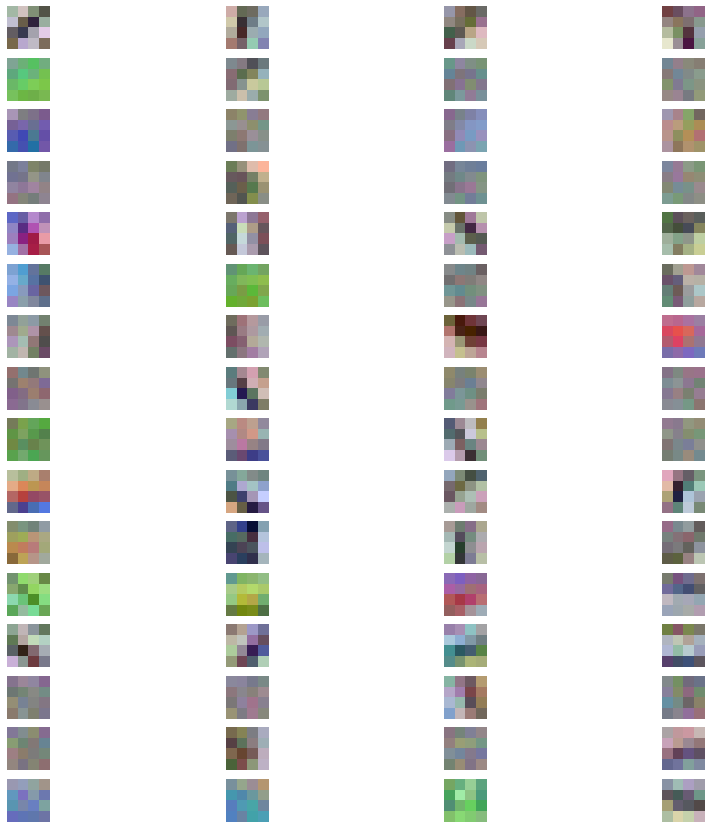

conv2d_5 (4, 4, 64, 64)


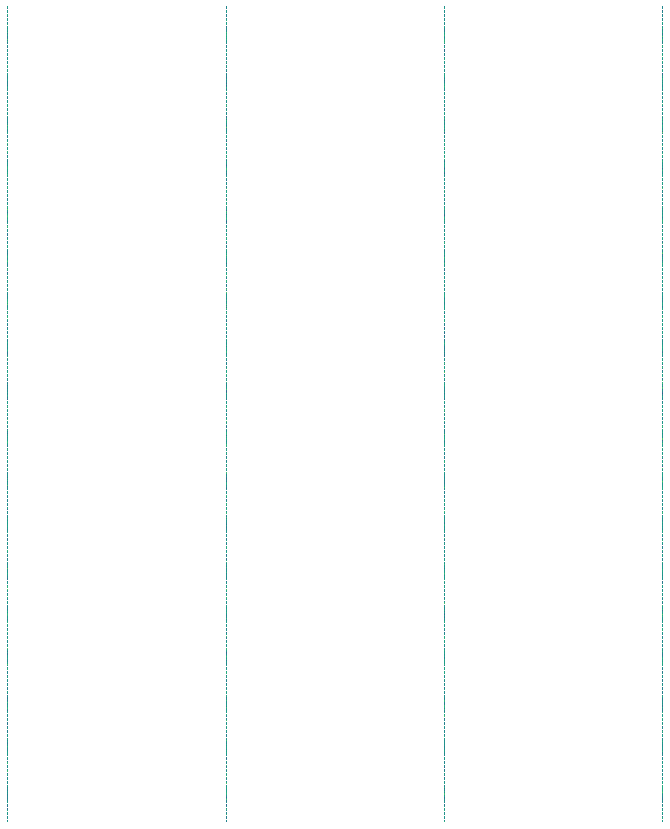

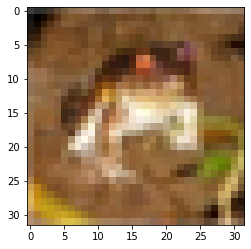

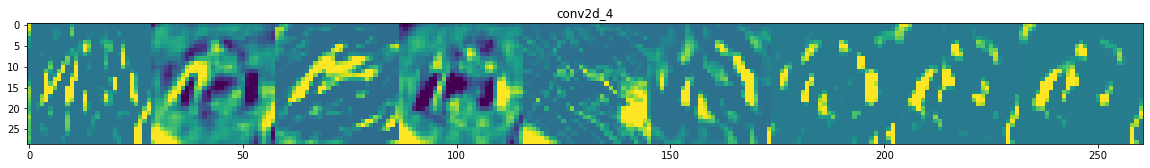

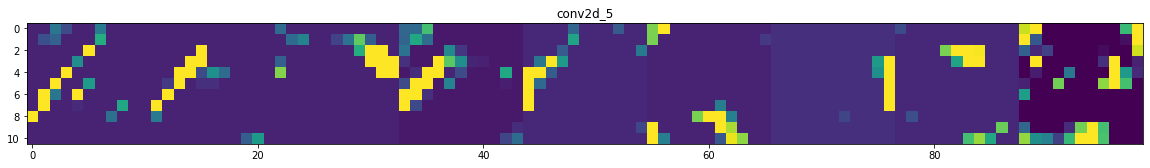

In [20]:
    #-------------------------------------------------------
    # visualization for model2, the second model scenario
    #-------------------------------------------------------
print("visualization of filters of model 2 in convolutional layers")
filterVisual(model2)


visualization of top 9 activations with selected figure


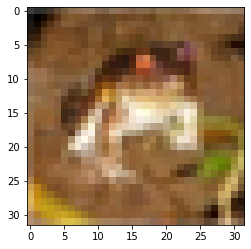

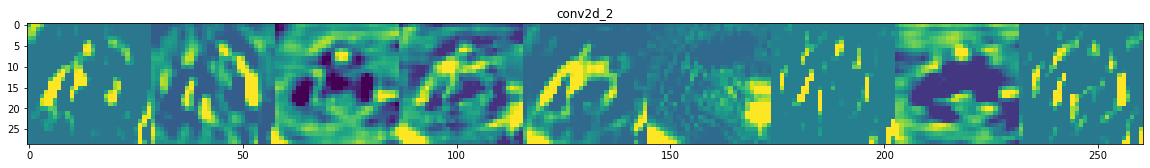

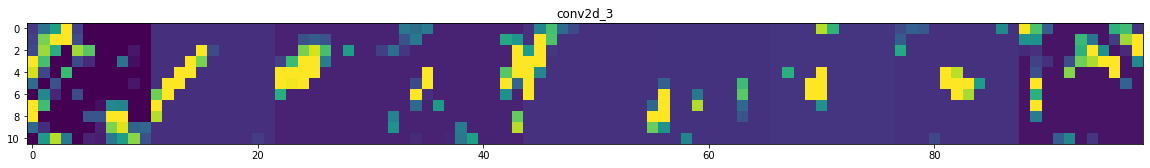

In [18]:
    #-------------------------------------------------------
    # visualization for model2, the second model scenario
    #-------------------------------------------------------
print("visualization of top 9 activations with selected figure")
top9FeatureMapVisual(model2, X_train, 0)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        3136      
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        65600     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        65600     
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 64)          65600     
                                                      

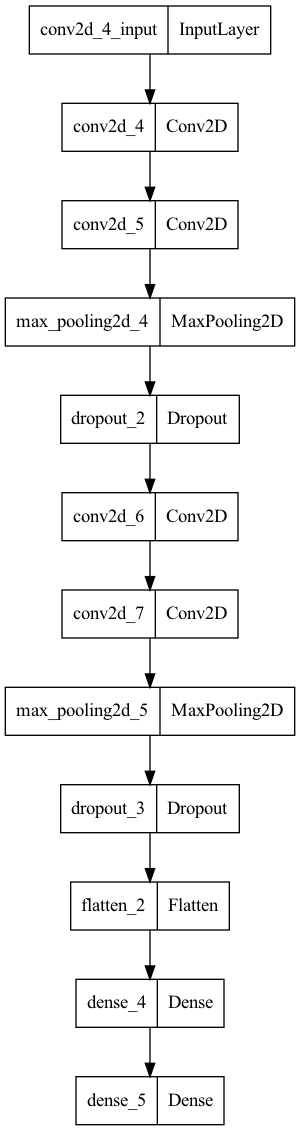

In [21]:
## define third cnn model in the experiment, adding two convolutional layers before the max pooling layer(2 by 2)
## filter size of 64 and strides of 2. Also adding the dropout of 0.1 and 0.25 for first and second set of convolutional
## layers to prevent overfitting.
## plot the model configuration.

model3 = models.Sequential()
model3.add(layers.Conv2D(filters=64,kernel_size=(4,4), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model3.add(layers.Conv2D(filters=64,kernel_size=(4,4), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D((2, 2),strides=2,padding='valid'))
model3.add(layers.Dropout(0.1))
model3.add(layers.Conv2D(filters=64,kernel_size=(4,4), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model3.add(layers.Conv2D(filters=64,kernel_size=(4,4), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D((2, 2),strides=2,padding='valid'))
model3.add(layers.Dropout(0.25))
model3.add(layers.Flatten())
model3.add(layers.Dense(128, activation ='relu'))
model3.add(layers.Dense(10, activation ='softmax'))

model3.summary()
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
plot_model(model3, to_file='third_model.png')

In [22]:
## train the model3 for 15 epoches

history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15,verbose=1)

Epoch 1/15
1563/1563 [==============================] - 137s 87ms/step - loss: 1.6661 - accuracy: 0.3851 - val_loss: 1.3680 - val_accuracy: 0.4972
Epoch 2/15
1563/1563 [==============================] - 137s 88ms/step - loss: 1.3030 - accuracy: 0.5331 - val_loss: 1.1716 - val_accuracy: 0.5774
Epoch 3/15
1563/1563 [==============================] - 128s 82ms/step - loss: 1.1432 - accuracy: 0.5948 - val_loss: 1.0640 - val_accuracy: 0.6244
Epoch 4/15
1563/1563 [==============================] - 130s 83ms/step - loss: 1.0392 - accuracy: 0.6334 - val_loss: 0.9736 - val_accuracy: 0.6564
Epoch 5/15
1563/1563 [==============================] - 138s 88ms/step - loss: 0.9552 - accuracy: 0.6634 - val_loss: 0.9347 - val_accuracy: 0.6738
Epoch 6/15
1563/1563 [==============================] - 122s 78ms/step - loss: 0.8957 - accuracy: 0.6862 - val_loss: 0.9072 - val_accuracy: 0.6848
Epoch 7/15
1563/1563 [==============================] - 126s 80ms/step - loss: 0.8533 - accuracy: 0.7011 - val_loss: 0

In [26]:
## evaluate the model's accuracy

model3.evaluate(X_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.8098 - accuracy: 0.7239


[0.8098383545875549, 0.7239000201225281]

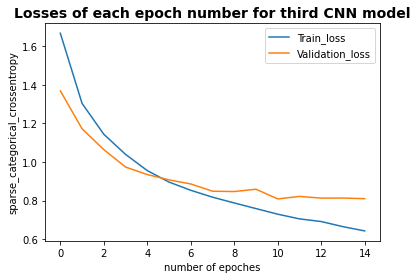

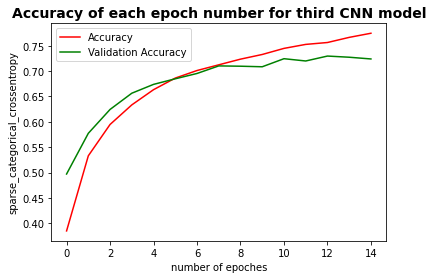

In [27]:
## plot model3's accuracy

model3_train = history3.history['loss']
model3_validation = history3.history['val_loss']
model3_accuracy = history3.history['accuracy']
model3_valaccuracy = history3.history['val_accuracy']
  
# plot losses
plt.plot(model3_train, label = "Train_loss")
plt.plot(model3_validation, label = "Validation_loss")

plt.xlabel('number of epoches')
plt.ylabel('sparse_categorical_crossentropy')
plt.title('Losses of each epoch number for third CNN model',fontweight ="bold",fontsize=14)
plt.legend()
plt.show()

# plot accuracy
plt.plot(model3_accuracy, label = "Accuracy",color="red")
plt.plot(model3_valaccuracy, label = "Validation Accuracy",color="green")

plt.xlabel('number of epoches')
plt.ylabel('sparse_categorical_crossentropy')
plt.title('Accuracy of each epoch number for third CNN model',fontweight ="bold",fontsize=14)
plt.legend()
plt.show()

visualization of filters of model 3 in convolutional layers
conv2d_4 (4, 4, 3, 64)


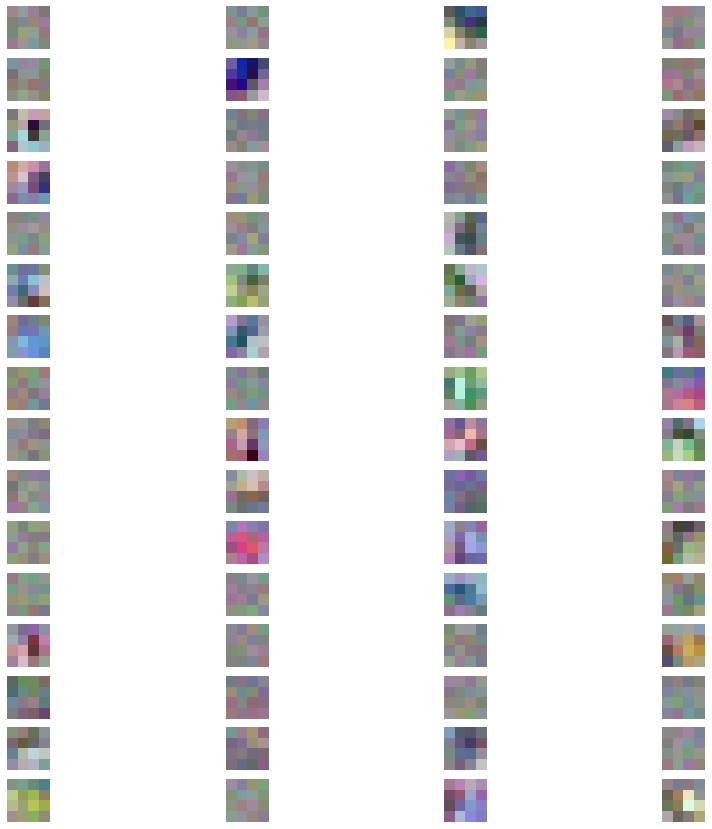

conv2d_5 (4, 4, 64, 64)


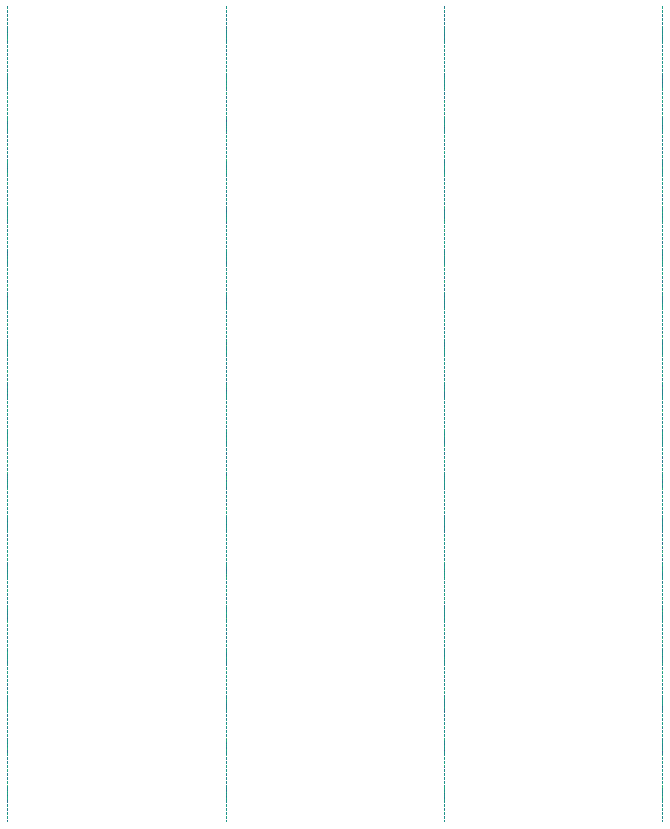

conv2d_6 (4, 4, 64, 64)


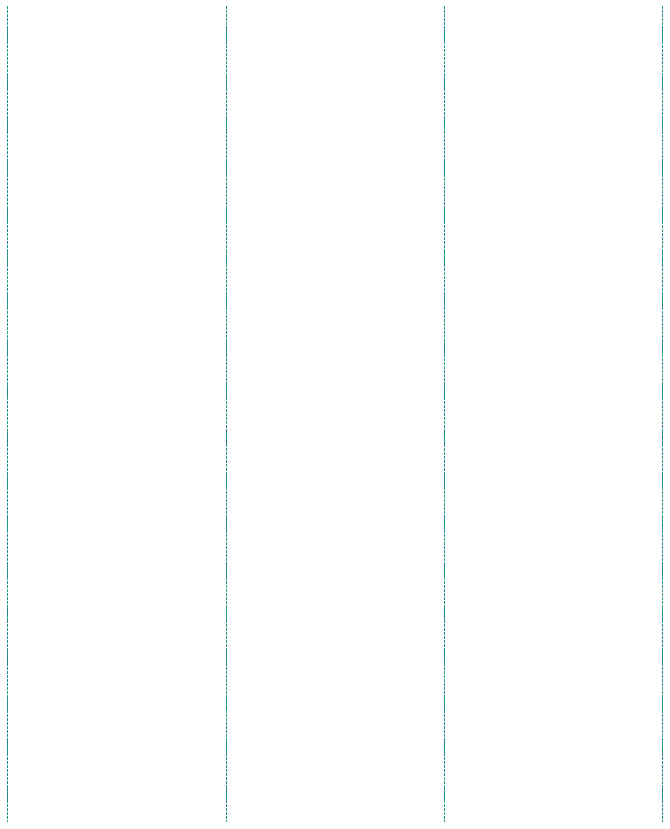

conv2d_7 (4, 4, 64, 64)


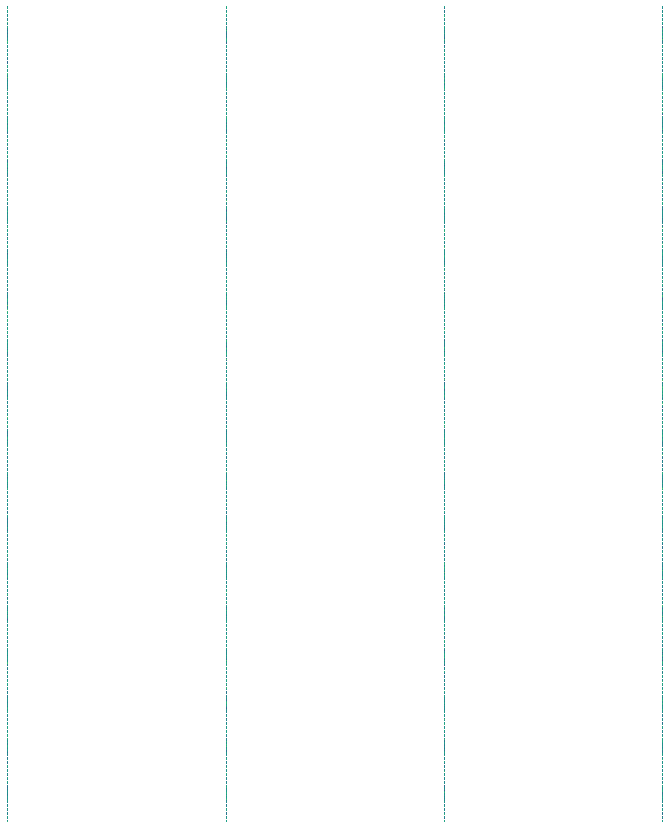

In [28]:
    #-------------------------------------------------------
    # visualization for model3, the third model scenario
    #-------------------------------------------------------
print("visualization of filters of model 3 in convolutional layers")
filterVisual(model3)



visualization of top 9 activations with selected figure


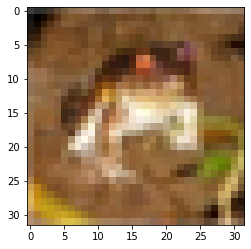

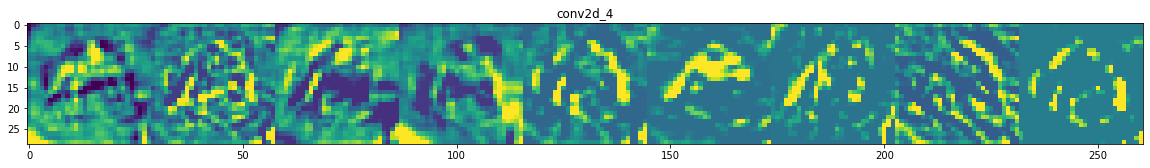

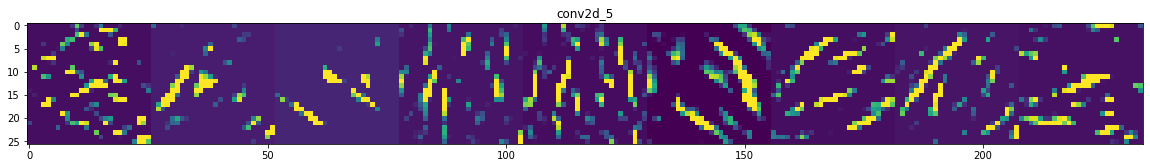

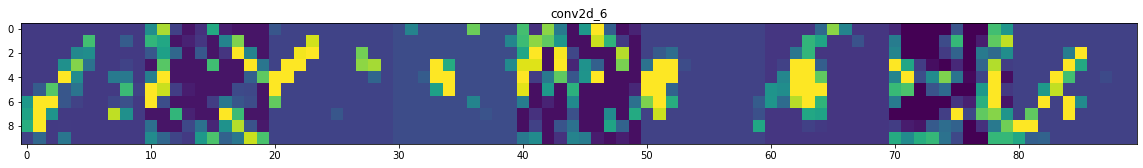

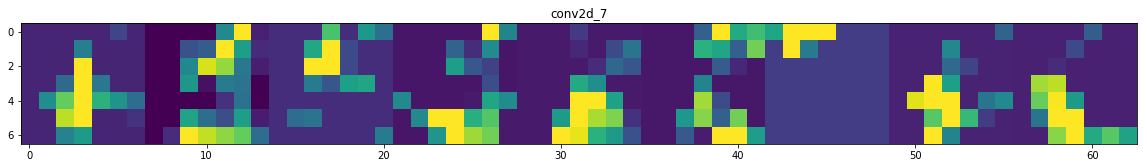

In [24]:
   #-------------------------------------------------------
   # visualization for model3, the third model scenario
   #-------------------------------------------------------
print("visualization of top 9 activations with selected figure")
top9FeatureMapVisual(model3, X_train, 0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 64)        3136      
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        65600     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        65600     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          65600     
                                                        

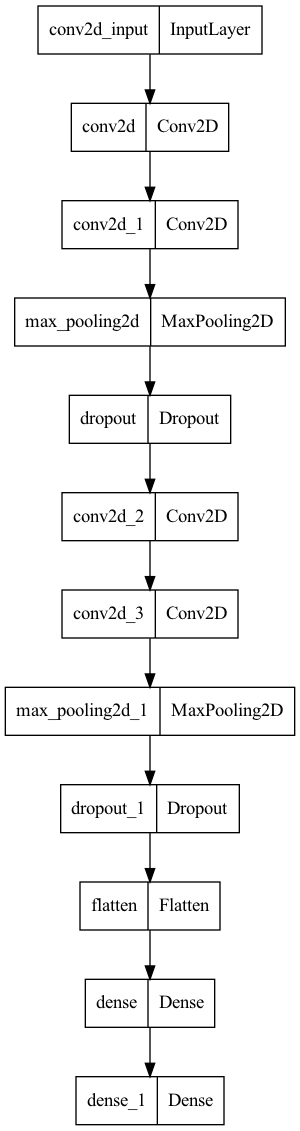

In [4]:
## define forth cnn model in the experiment, changing the dropout rate (to 0.5 and 0.25 respectively,which 
## deactivated more neurons after the convolutional layers) 
## and activated more neurons in fully connected layers (to 256) to prevent overfitting
## filter size of 64 and strides of 2. 
## plot the model configuration.

model4 = models.Sequential()
model4.add(layers.Conv2D(filters=64,kernel_size=(4,4), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model4.add(layers.Conv2D(filters=64,kernel_size=(4,4), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model4.add(layers.MaxPooling2D((2, 2),strides=2,padding='valid'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Conv2D(filters=64,kernel_size=(4,4), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model4.add(layers.Conv2D(filters=64,kernel_size=(4,4), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model4.add(layers.MaxPooling2D((2, 2),strides=2,padding='valid'))
model4.add(layers.Dropout(0.25))
model4.add(layers.Flatten())
model4.add(layers.Dense(256, activation ='relu'))
model4.add(layers.Dense(10, activation ='softmax'))

model4.summary()
model4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
plot_model(model4, to_file='forth_model.png')

In [5]:
## train the model for 15 epoches

history4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15,verbose=1)

Epoch 1/15
1563/1563 [==============================] - 256s 163ms/step - loss: 1.6748 - accuracy: 0.3798 - val_loss: 1.3977 - val_accuracy: 0.4925
Epoch 2/15
1563/1563 [==============================] - 240s 154ms/step - loss: 1.3487 - accuracy: 0.5118 - val_loss: 1.2784 - val_accuracy: 0.5328
Epoch 3/15
1563/1563 [==============================] - 237s 151ms/step - loss: 1.2175 - accuracy: 0.5655 - val_loss: 1.0964 - val_accuracy: 0.6103
Epoch 4/15
1563/1563 [==============================] - 236s 151ms/step - loss: 1.1322 - accuracy: 0.5967 - val_loss: 1.0584 - val_accuracy: 0.6228
Epoch 5/15
1563/1563 [==============================] - 248s 159ms/step - loss: 1.0678 - accuracy: 0.6236 - val_loss: 1.0327 - val_accuracy: 0.6327
Epoch 6/15
1563/1563 [==============================] - 237s 152ms/step - loss: 1.0230 - accuracy: 0.6381 - val_loss: 0.9662 - val_accuracy: 0.6599
Epoch 7/15
1563/1563 [==============================] - 235s 150ms/step - loss: 0.9878 - accuracy: 0.6506 - val_

In [6]:
## evaluate model's accuracy

model4.evaluate(X_test,y_test)

313/313 [==============================] - 11s 34ms/step - loss: 0.8609 - accuracy: 0.7029


[0.860899806022644, 0.7028999924659729]

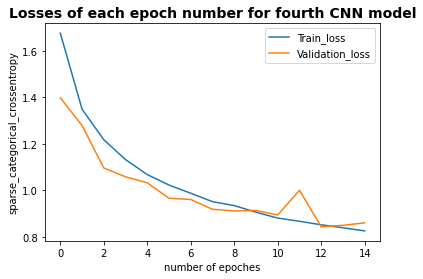

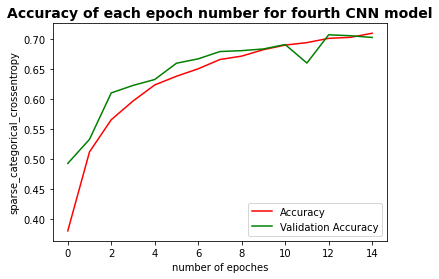

In [7]:
## plot the result of model4

model4_train = history4.history['loss']
model4_validation = history4.history['val_loss']
model4_accuracy = history4.history['accuracy']
model4_valaccuracy = history4.history['val_accuracy']
  
# plot losses
plt.plot(model4_train, label = "Train_loss")
plt.plot(model4_validation, label = "Validation_loss")

plt.xlabel('number of epoches')
plt.ylabel('sparse_categorical_crossentropy')
plt.title('Losses of each epoch number for fourth CNN model',fontweight ="bold",fontsize=14)
plt.legend()
plt.show()

# plot accuracy
plt.plot(model4_accuracy, label = "Accuracy",color="red")
plt.plot(model4_valaccuracy, label = "Validation Accuracy",color="green")

plt.xlabel('number of epoches')
plt.ylabel('sparse_categorical_crossentropy')
plt.title('Accuracy of each epoch number for fourth CNN model',fontweight ="bold",fontsize=14)
plt.legend()
plt.show()

visualization of filters of model 4 in convolutional layers
conv2d_8 (4, 4, 3, 64)


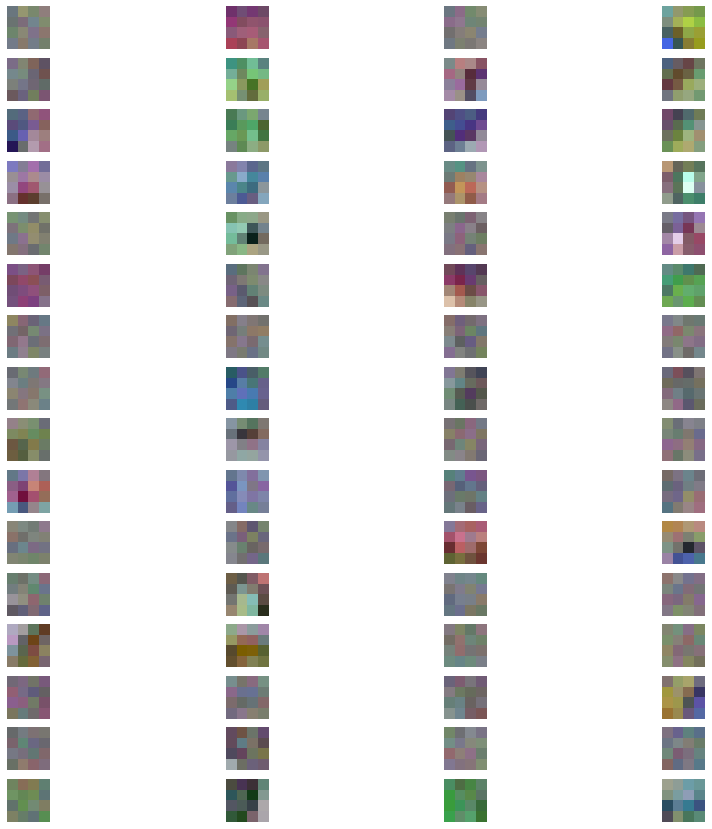

conv2d_9 (4, 4, 64, 64)


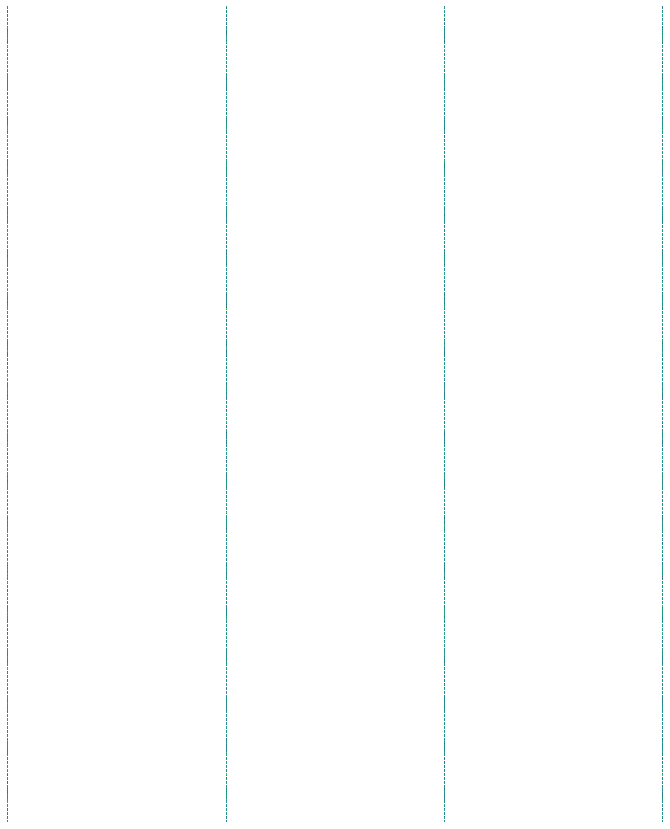

conv2d_10 (4, 4, 64, 64)


In [ ]:
    #-------------------------------------------------------
    # visualization for model4, the forth model scenario
    #-------------------------------------------------------
print("visualization of filters of model 4 in convolutional layers")
filterVisual(model4)

visualization of top 9 activations with selected figure


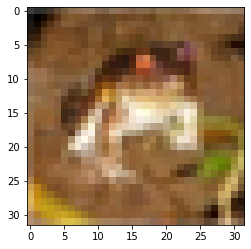

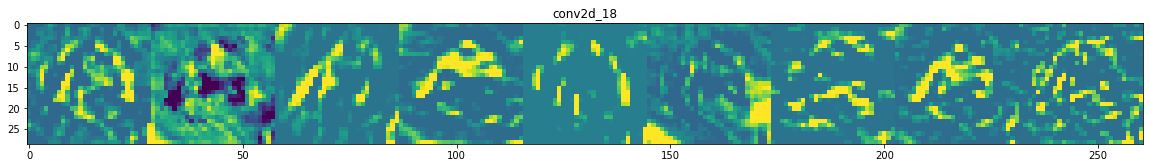

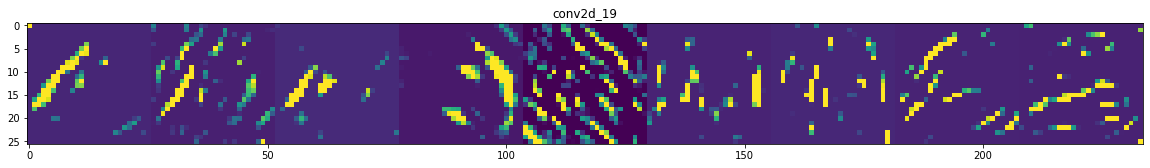

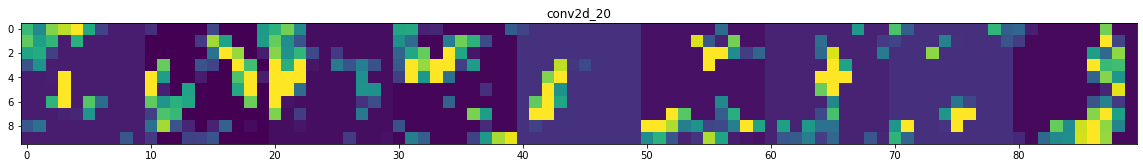

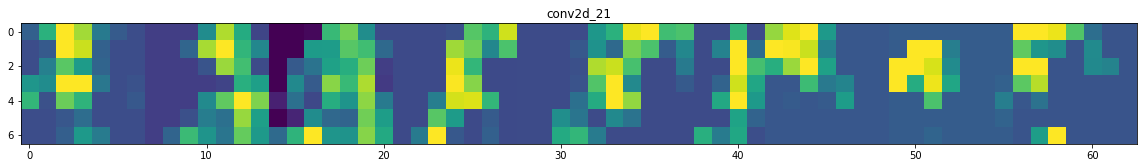

In [47]:
   #-------------------------------------------------------
   # visualization for model4, the forth model scenario
   #-------------------------------------------------------
print("visualization of top 9 activations with selected figure")
top9FeatureMapVisual(model4, X_train, 0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        1568      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        16416     
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

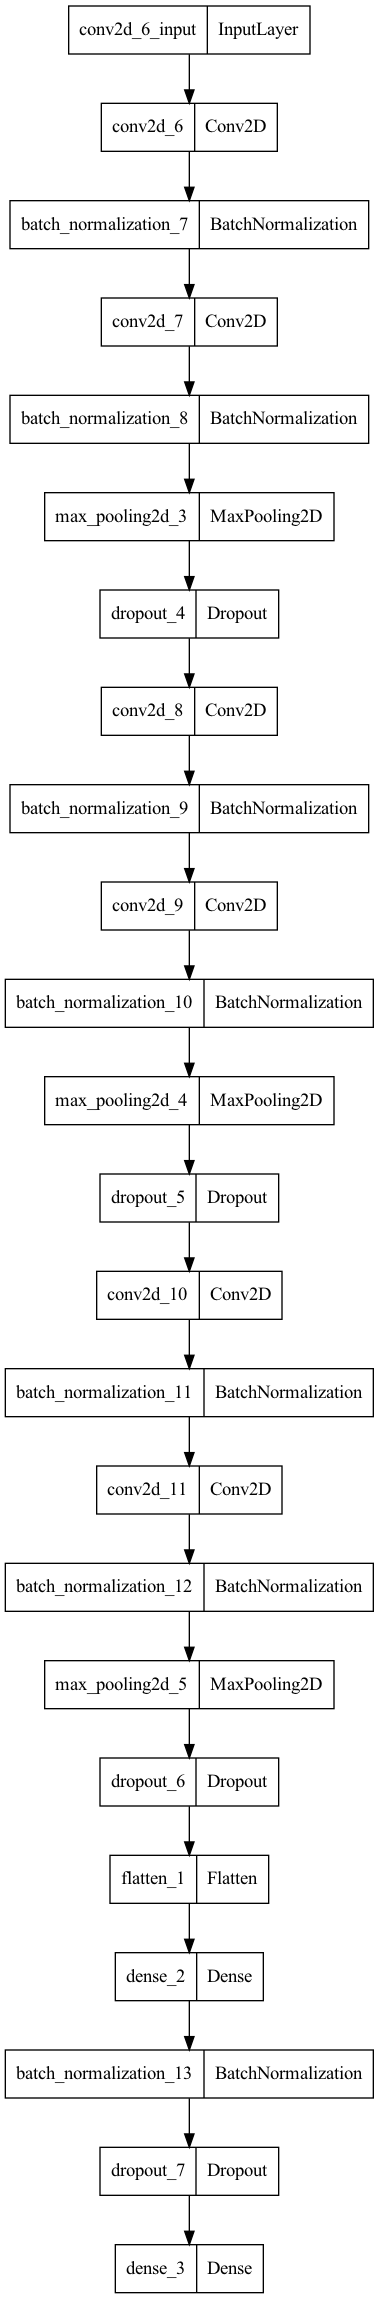

In [9]:
## define fifth cnn model in the experiment, adding more convolution layers, changing the dropout rate 
## to 0.1, 0.25, and 0.35 respectively.
## to increase the training efficiency, change the max pooling size to 4 by 4 and fully connected layer
## size to 128 neurons.

model5 = models.Sequential()
model5.add(layers.Conv2D(filters=32,kernel_size=(4,4), padding='same', activation='relu', input_shape=(32, 32, 3)))
model5.add(layers.BatchNormalization())
model5.add(layers.Conv2D(filters=32,kernel_size=(4,4), padding='same', activation='relu', input_shape=(32, 32, 3)))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D((2, 2),strides=2,padding='same'))
model5.add(layers.Dropout(0.1))
model5.add(layers.Conv2D(filters=64,kernel_size=(4,4), padding='same', activation='relu', input_shape=(32, 32, 3)))
model5.add(layers.BatchNormalization())
model5.add(layers.Conv2D(filters=64,kernel_size=(4,4), padding='same', activation='relu', input_shape=(32, 32, 3)))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D((4, 4),strides=4,padding='same'))
model5.add(layers.Dropout(0.25))
model5.add(layers.Conv2D(filters=64,kernel_size=(4,4), padding='same', activation='relu', input_shape=(32, 32, 3)))
model5.add(layers.BatchNormalization())
model5.add(layers.Conv2D(filters=64,kernel_size=(4,4), padding='same', activation='relu', input_shape=(32, 32, 3)))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D((4, 4),strides=4,padding='same'))
model5.add(layers.Dropout(0.35))
model5.add(layers.Flatten())
model5.add(layers.Dense(128, activation ='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(10, activation ='softmax'))

model5.summary()
model5.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
plot_model(model5, to_file='fifth_model.png')

In [10]:
## train the model for 15 epoches

history5 = model5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15,verbose=1)

Epoch 1/15
1563/1563 [==============================] - 196s 125ms/step - loss: 1.8290 - accuracy: 0.3515 - val_loss: 1.3331 - val_accuracy: 0.5067
Epoch 2/15
1563/1563 [==============================] - 196s 125ms/step - loss: 1.2223 - accuracy: 0.5616 - val_loss: 1.0704 - val_accuracy: 0.6101
Epoch 3/15
1563/1563 [==============================] - 182s 116ms/step - loss: 1.0222 - accuracy: 0.6434 - val_loss: 0.8918 - val_accuracy: 0.6806
Epoch 4/15
1563/1563 [==============================] - 174s 112ms/step - loss: 0.8963 - accuracy: 0.6935 - val_loss: 0.8062 - val_accuracy: 0.7150
Epoch 5/15
1563/1563 [==============================] - 193s 124ms/step - loss: 0.8167 - accuracy: 0.7243 - val_loss: 0.8209 - val_accuracy: 0.7189
Epoch 6/15
1563/1563 [==============================] - 171s 109ms/step - loss: 0.7445 - accuracy: 0.7505 - val_loss: 0.7790 - val_accuracy: 0.7386
Epoch 7/15
1563/1563 [==============================] - 168s 108ms/step - loss: 0.6931 - accuracy: 0.7690 - val_

In [11]:
## evaluate model's accuracy

model5.evaluate(X_test,y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.5493 - accuracy: 0.8221


[0.5493364334106445, 0.8220999836921692]

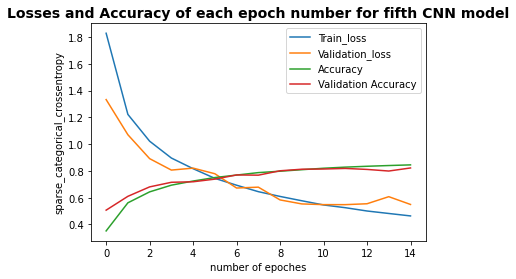

In [12]:
## plot the result of model5

model5_train = history5.history['loss']
model5_validation = history5.history['val_loss']
model5_accuracy = history5.history['accuracy']
model5_valaccuracy = history5.history['val_accuracy']
  
# plot losses
plt.plot(model5_train, label = "Train_loss")
plt.plot(model5_validation, label = "Validation_loss")

plt.xlabel('number of epoches')
plt.ylabel('sparse_categorical_crossentropy')
plt.title('Losses of each epoch number for fifth CNN model',fontweight ="bold",fontsize=14)
plt.legend()
plt.show()

# plot accuracy
plt.plot(model5_accuracy, label = "Accuracy",color="red")
plt.plot(model5_valaccuracy, label = "Validation Accuracy",color="green")

plt.xlabel('number of epoches')
plt.ylabel('sparse_categorical_crossentropy')
plt.title('Accuracy of each epoch number for fifth CNN model',fontweight ="bold",fontsize=14)
plt.legend()
plt.show()

visualization of filters of model 4 in convolutional layers
conv2d_12 (4, 4, 3, 64)


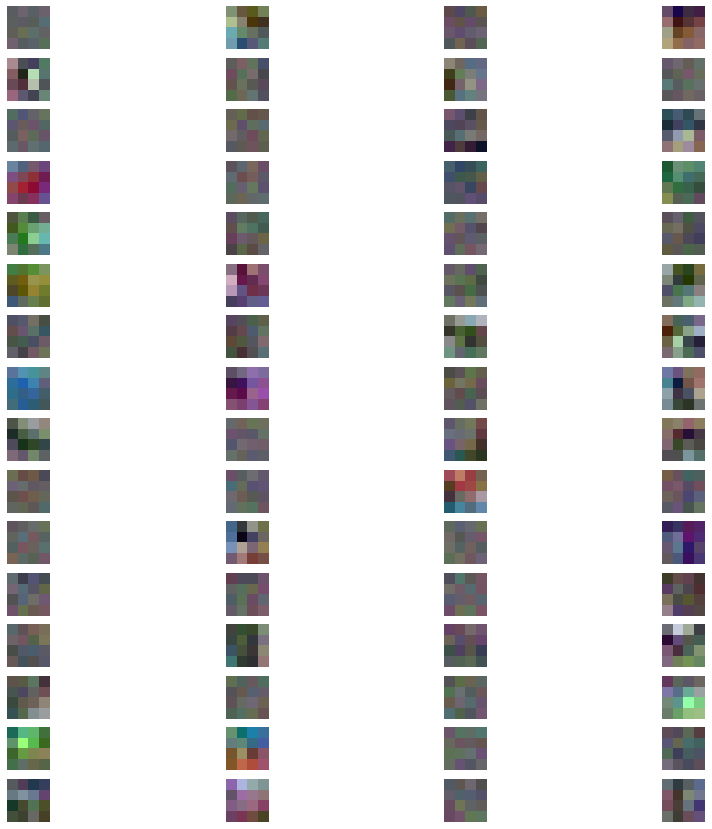

conv2d_13 (4, 4, 64, 64)


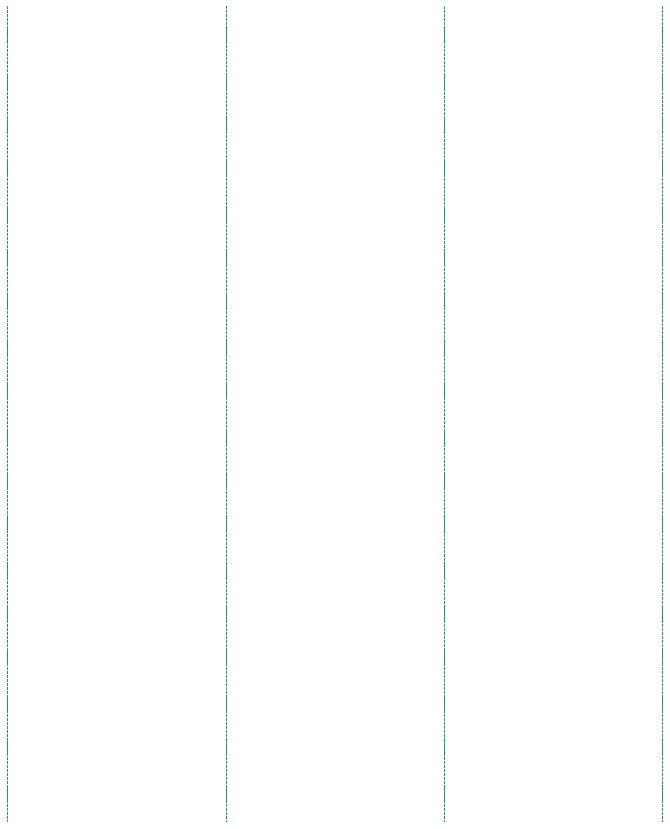

conv2d_14 (4, 4, 64, 128)


In [ ]:
    #-------------------------------------------------------
    # visualization for model5, the fifth model scenario
    #-------------------------------------------------------
print("visualization of filters of model 5 in convolutional layers")
filterVisual(model5)

In [ ]:
#-------------------------------------------------------
# visualization for model5, the fifth model scenario
#-------------------------------------------------------
print("visualization of top 9 activations with selected figure")
top9FeatureMapVisual(model5, X_test, 1)

visualization of top 9 activations with selected figure
